In [1]:
#Importing Relevant Libraries
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing import image
from keras.optimizers import Adam, RMSprop
#from sklearn.model_selection import train_test_split
import os
import random
import shutil

Using TensorFlow backend.


In [2]:
#Setting master, train, and test directories for dataset

directory = "5_clusters_master"
directory_testing = "5_clusters_Test"
directory_training = "5_clusters_Train"

#directory = "ObjectCategories_Master"
#directory_testing = "ObjectCategories_Test"
#directory_training = "ObjectCategories_Train"

#directory = "faces_master"
#directory_testing = "faces_test"
#directory_training = "faces_train"

#directory = "Resize_Compress_Photos"
#directory_testing = "Resize_Compress_Photos_Test"
#directory_training = "Resize_Compress_Photos_Train"

In [4]:
#this code takes the objectcategories_master folder and copies them to make a test and train set
#20% of the data is used for testing, 80% is used for training
#pictures should be added to the objectcategories_master to their respective folder, and needs to be a .jpg format

master_directory_subfolders = os.listdir(path = directory)
try:
    shutil.rmtree(directory_testing)
except FileNotFoundError:
    None
    
try:
    shutil.rmtree(directory_training)
except FileNotFoundError:
    None

for folder in master_directory_subfolders:
    images = [file for file in os.listdir(directory+"/"+folder) if file.endswith(".jpg")]
    random.shuffle(images)
    num_images = len(images)
    
    if not os.path.exists(directory_testing+"/"+folder):
        os.makedirs(directory_testing+"/"+folder)
    if not os.path.exists(directory_training+"/"+folder):
        os.makedirs(directory_training+"/"+folder)
        
    for index, imagefile in enumerate(images):
        if index <= int((num_images* 0.2)):
            shutil.copy(directory+"/"+folder+"/"+imagefile, directory_testing+"/"+folder)
        else:
            shutil.copy(directory+"/"+folder+"/"+imagefile, directory_training+"/"+folder)    

In [15]:
#declaring keras image dataset input, rescale for 10 with 10 cluster image, 5 for the 5, 255 for the uncompressed

#keras_img_datagen_test = image.ImageDataGenerator(rescale = 1/10)
#keras_img_datagen_train = image.ImageDataGenerator(rescale = 1/10)

keras_img_datagen_test = image.ImageDataGenerator(rescale = 1/255)
keras_img_datagen_train = image.ImageDataGenerator(rescale = 1/255)

In [16]:
#declaring test and training datasets


#below is with imagesize of 100 x 100, with 32 bathsize, this proved too computationally intense for our hardware
#img_data_test = keras_img_datagen_test.flow_from_directory(directory_testing, target_size=(100, 100), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, subset=None, interpolation='nearest')
#img_data_train = keras_img_datagen_train.flow_from_directory(directory_training, target_size=(100, 100), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, subset=None, interpolation='nearest')

#the below is the final target size of 80 x 80 and a batchsize of 10
img_data_test = keras_img_datagen_test.flow_from_directory(directory_testing, target_size=(80, 80), color_mode='rgb', class_mode='categorical', batch_size=10, shuffle=True, subset=None, interpolation='nearest')
img_data_train = keras_img_datagen_train.flow_from_directory(directory_training, target_size=(80, 80), color_mode='rgb', class_mode='categorical', batch_size=10, shuffle=True, subset=None, interpolation='nearest')

Found 2257 images belonging to 100 classes.
Found 8718 images belonging to 100 classes.


In [17]:
#checking the input data
img_data_train[148][0].shape

(10, 80, 80, 3)

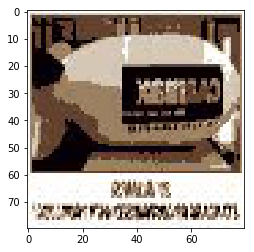

In [18]:
#checking the input data
plt.imshow(img_data_test[5][0][5,:,:,:])

In [43]:
#model creation

CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape= [80, 80, 3]
                 ))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(4096, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(100, activation='softmax'))
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 77, 77, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [44]:
#model declaration
CNN_model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(),
              metrics=['accuracy'])

In [45]:
#training model
CNN_model.fit_generator(
        img_data_train,
        steps_per_epoch=871,
        epochs=30,
        validation_data= img_data_test,
        validation_steps=225)

Epoch 1/30
871/871 [==============================] - 228s 261ms/step - loss: 15.8193 - acc: 0.0181 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 2/30
871/871 [==============================] - 229s 263ms/step - loss: 15.8220 - acc: 0.0184 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 3/30
871/871 [==============================] - 233s 268ms/step - loss: 15.8220 - acc: 0.0184 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 4/30
871/871 [==============================] - 223s 256ms/step - loss: 15.8239 - acc: 0.0183 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 5/30
871/871 [==============================] - 214s 245ms/step - loss: 15.8202 - acc: 0.0185 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 6/30
871/871 [==============================] - 214s 245ms/step - loss: 15.8220 - acc: 0.0184 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 7/30
871/871 [==============================] - 213s 245ms/step - loss: 15.8239 - acc: 0.0183 - val_loss: 15.8244 - val_acc: 0.0182
Epoch 8/30
871/871 [==============

##### score = CNN_model.evaluate_generator(img_data_test, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

In [ ]:
print(score)

In [ ]:
score = CNN_model.evaluate(img_data_test, img_data_test, verbose=0)

In [45]:
#saving model
CNN_model.save("100_object_model_NOT_compressed_30_epoch.h5")